<h1><center>Team number - 29</center></h1>

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split
import sklearn
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

In [247]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!tar -xvf  '/content/drive/MyDrive/assignment5.tar.gz' -C '/content/drive/MyDrive/SNS'

assignment5/full.csv
assignment5/test.csv
assignment5/Assignment.pdf
assignment5/


In [248]:
FOLDER_PATH = "/content/drive/MyDrive/assignment5/full.csv"

In [249]:
data_x = pd.read_csv(FOLDER_PATH,header=None)


In [251]:
data_y = pd.read_csv("/content/drive/MyDrive/assignment5/test.csv",header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,27,28,30,31,34,36,37,38,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [252]:
dict_tcp = {'tcp':0,'udp':1,'icmp':2}
dict_ip = {'http':0 ,'smtp':1 ,'domain_u':2, 'auth':3 ,'finger':4 ,'telnet':5, 'eco_i':6, 'ftp':7, 'ntp_u':8,'ecr_i':9, 'other':10 ,
           'urp_i':11, 'private':12, 'pop_3':13, 'ftp_data':14 ,'netstat':15, 'daytime':16,'ssh':17, 'echo':18, 'time':19, 'name':20,
           'whois':21, 'domain':22, 'mtp':23, 'gopher':24, 'remote_job':25,'rje':26, 'ctf':27, 'supdup':28, 'link':29, 'systat':30, 
           'discard':31, 'X11':32, 'shell':33, 'login':34,'imap4':35, 'nntp':36, 'uucp':37, 'pm_dump':38, 'IRC':39, 'Z39_50':40, 
           'netbios_dgm':41, 'ldap':42,'sunrpc':43, 'courier':44, 'exec':45, 'bgp':46, 'csnet_ns':47, 'http_443':48, 'klogin':49, 
           'printer':50,'netbios_ssn':51, 'pop_2':52, 'nnsp':53, 'efs':54, 'hostnames':55, 'uucp_path':56, 'sql_net':57,'vmnet':58, 
           'iso_tsap':59, 'netbios_ns':60, 'kshell':61, 'urh_i':62 ,'http_2784':63, 'harvest':64,'aol':65, 'tftp_u':66, 'http_8001':67,
           'tim_i':68, 'red_i':69}
dict_SF = {'SF':0, 'S2':1, 'S1':2, 'S3':3, 'OTH':4, 'REJ':5, 'RSTO':6, 'S0':7, 'RSTR':8, 'RSTOS0':9, 'SH':10}

dict_normal = {'normal.':0, 'buffer_overflow.':1, 'loadmodule.':2, 'perl.':3, 'neptune.':4, 'smurf.':5,'guess_passwd.':6, 'pod.':7, 
               'teardrop.':8, 'portsweep.':9 ,'ipsweep.':10, 'land.':11,'ftp_write.':12, 'back.':13, 'imap.':14, 'satan.':15, 'phf.':16,
               'nmap.':17, 'multihop.':18,'warezmaster.':19, 'warezclient.':20, 'spy.':21, 'rootkit.':22}

In [253]:
data_x[1]=data_x[1].map(dict_tcp)
data_x[2]=data_x[2].map(dict_ip)
data_x[3]=data_x[3].map(dict_SF)
data_x[41]=data_x[41].map(dict_normal)

In [254]:
data_x=data_x.dropna()

In [242]:
print(data_x.nunique())

0      9883
1         3
2        70
3        11
4      7195
5     21493
6         2
7         3
8         6
9        30
10        6
11        2
12       98
13        2
14        3
15       93
16       42
17        3
18       10
19        1
20        2
21        2
22      512
23      512
24       96
25       87
26       89
27       76
28      101
29       95
30       72
31      256
32      256
33      101
34      101
35      101
36       76
37      101
38      100
39      101
40      101
41       23
dtype: int64


In [243]:
data_x = data_x.drop([6,11,19], axis = 1)

In [ ]:
# data = data.drop(["PassengerId","Ticket","Cabin","Name"],axis=1)

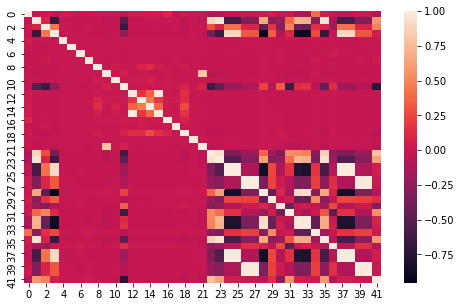

In [244]:
 import seaborn as sns
 corr = data_x.corr()
  
plt.figure(figsize =(8,5))
  
sns.heatmap(corr)

In [245]:
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data_x.drop([41], axis = 1).values
y = data_x[41].values

S = MinMaxScaler()
X = S.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

X_train.shape, X_test.shape,y_train.shape, y_test.shape

((3428901, 40), (1469530, 40), (3428901,), (1469530,))

In [150]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#  Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 21)

In [159]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['entropy'],
              'max_depth': [4,8,12,13,15,17,19,20,21]
             }

In [160]:
grid_obj = GridSearchCV(clfd, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [170]:
# clfd = grid_obj.best_estimator_

In [194]:
clfd.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=21, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [195]:
print("Test score is:", clfd.score(X_test, y_test))

Test score is: 0.9999040509550673


In [196]:
y_predd = clfd.predict(X_test)
print("F1_score",f1_score(y_predd,y_test,average='micro'))
print("precision",precision_score(y_predd,y_test,average='micro'))
print("recall",recall_score(y_predd,y_test,average='micro'))

F1_score 0.9999040509550673
precision 0.9999040509550673
recall 0.9999040509550673


In [197]:
print(len(np.unique(y_predd)))

20


# RandomForest

In [151]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(n_estimators = 50)
clfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
print("Test score is:", clfr.score(X_test, y_test))

Test score is: 0.999916299769314


In [153]:
y_predr = clfr.predict(X_test)
print("F1_score",f1_score(y_predr,y_test,average='micro'))
print("precision",precision_score(y_predr,y_test,average='micro'))
print("recall",recall_score(y_predr,y_test,average='micro'))

F1_score 0.999916299769314
precision 0.999916299769314
recall 0.999916299769314


In [154]:
print(len(np.unique(y_predr)))

17


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
clfl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1200000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Test score is:", clfr.score(X_test, y_test))

Test score is: 0.9999156192796336


In [ ]:
y_predl = clfl.predict(X_test)
print("F1_score",f1_score(y_predl,y_test,average='micro'))
print("precision",precision_score(y_predl,y_test,average='micro'))
print("recall",recall_score(y_predl,y_test,average='micro'))

F1_score 0.9989295897327717
precision 0.9989295897327717
recall 0.9989295897327717


In [198]:
data_y = data_y.drop([0], axis = 1)

In [199]:
data_y

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.11,0.12,0.13,0.14,0.15,0.16,1,1.1,0.0,0.00.1,0.00.2,0.00.3,1.0,0.00.4,0.00.5,255,254,1.00.1,0.01,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0,0,0,1.0,0,0,255,255,1,0.00,0.01,0,0,0,0,0
311025,0,udp,private,SF,105,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,4.0,0.0,0,0,0,1.0,0,0,255,255,1,0.00,0.01,0,0,0,0,0
311026,0,udp,private,SF,105,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0,0,0,1.0,0,0,255,255,1,0.00,0.01,0,0,0,0,0
311027,0,udp,private,SF,105,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,4.0,0.0,0,0,0,1.0,0,0,255,255,1,0.00,0.01,0,0,0,0,0


In [200]:
data_y[2]=data_y[2].map(dict_tcp)
data_y[3]=data_y[3].map(dict_ip)
data_y[4]=data_y[4].map(dict_SF)

In [201]:
data_y

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,1,12.0,0,105,146,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.11,0.12,0.13,0.14,0.15,0.16,1,1.1,0.0,0.00.1,0.00.2,0.00.3,1.0,0.00.4,0.00.5,255,254,1.00.1,0.01,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
1,0,1,12.0,0,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,12.0,0,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,12.0,0,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,12.0,0,105,146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,1,12.0,0,105,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0,0,0,1.0,0,0,255,255,1,0.00,0.01,0,0,0,0,0
311025,0,1,12.0,0,105,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,4.0,0.0,0,0,0,1.0,0,0,255,255,1,0.00,0.01,0,0,0,0,0
311026,0,1,12.0,0,105,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2,2.0,0.0,0,0,0,1.0,0,0,255,255,1,0.00,0.01,0,0,0,0,0
311027,0,1,12.0,0,105,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,4.0,0.0,0,0,0,1.0,0,0,255,255,1,0.00,0.01,0,0,0,0,0


**Assigning Random values to the first row**

In [202]:
# a =[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
for i in range(25,41):
  data_y.iloc[0:1,i]= 1.0
data_y.iloc[0:1,31]=255
data_y.iloc[0:1,32]=254
data_y.iloc[0:1,25:41]

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,1,1,1,1.0,1,1,255,254,1,1.0,1,1,1,1,1,1


**Changing the Dtypes from Object to float64**

In [203]:
for i in range(26,42):
  data_y[i] = pd.to_numeric(data_y[i], errors='coerce')

**Replacing all the nan values ,if any, generated while changing the datatype**

In [204]:
data_y = data_y.replace(np.nan, 0, regex=True)

**Normalise the Test.csv data**

In [205]:
Normalised_y = S.fit_transform(data_y)

**Predicting using DT Classifier**

In [229]:
y_final_pred = clfd.predict(Normalised_y)
y_final_pred_df = pd.DataFrame(y_final_pred, columns = ['Label'])
y_final_pred_df.shape

(311029, 1)

In [121]:
y_final_predr = clfr.predict(Normalised_y)
y_final_pred_dfr = pd.DataFrame(y_final_predr, columns = ['Label'])
y_final_pred_dfr.shape

(311029, 1)

**Exporting the testLabel.csv**

In [230]:
y_final_pred_df.to_csv (r'/content/drive/MyDrive/assignment5/testLabel.csv', index = False, header=True)

In [101]:
y_final_pred_dfr.to_csv (r'/content/drive/MyDrive/assignment5/testLabelr.csv', index = False, header=True)

**Reading the generated testLabel.csv and checking**

In [231]:
pd.read_csv('/content/drive/MyDrive/assignment5/testLabel.csv')

,Label
0,0
1,0
2,0
3,0
4,0
...,...
311024,2
311025,2
311026,2
311027,2


In [103]:
pd.read_csv('/content/drive/MyDrive/assignment5/testLabelr.csv')

,Label
0,0
1,0
2,0
3,0
4,0
...,...
311024,0
311025,0
311026,0
311027,0


In [232]:
print(y_final_pred_df.nunique())

Label    21
dtype: int64


In [105]:
print(y_final_pred_dfr.nunique())

Label    15
dtype: int64


In [106]:
y1 =y_final_pred
y2 = y_final_predr

In [233]:
print("test..",f1_score(y1,y2,average='micro'))

test.. 0.9941773918187693


In [234]:
Actual_label = {0:'normal.', 1:'buffer_overflow.', 2:'loadmodule.', 3:'perl.', 4:'neptune.', 5:'smurf.',6:'guess_passwd.', 7:'pod.', 
               8:'teardrop.', 9:'portsweep.' ,10:'ipsweep.', 11:'land.',12:'ftp_write.', 13:'back.', 14:'imap.', 15:'satan.', 16:'phf.',
               17:'nmap.', 18:'multihop.',19:'warezmaster.', 20:'warezclient.', 21:'spy.', 22:'rootkit.'}

In [235]:
ydtdf = y_final_pred_df
# yrfdf = y_final_pred_dfr
ydtdf

,Label
0,0
1,0
2,0
3,0
4,0
...,...
311024,2
311025,2
311026,2
311027,2


In [236]:
ydtdf['Label']=ydtdf['Label'].map(Actual_label)
# yrfdf['Label']=yrfdf['Label'].map(Actual_label)

In [237]:
print(ydtdf['Label'].unique())
ydtdf

['normal.' 'loadmodule.' 'smurf.' 'portsweep.' 'warezmaster.' 'imap.'
 'satan.' 'pod.' 'rootkit.' 'ipsweep.' 'back.' 'neptune.' 'multihop.'
 'warezclient.' 'nmap.' 'land.' 'guess_passwd.' 'spy.' 'teardrop.' 'phf.'
 'buffer_overflow.']


,Label
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.
...,...
311024,loadmodule.
311025,loadmodule.
311026,loadmodule.
311027,loadmodule.


In [221]:
print(yrfdf['Label'].unique())
yrfdf

['normal.' 'portsweep.' 'smurf.' 'ipsweep.' 'satan.' 'pod.' 'back.'
 'neptune.' 'warezmaster.' 'warezclient.' 'ftp_write.' 'nmap.' 'teardrop.'
 'land.' 'phf.']


,Label
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.
...,...
311024,normal.
311025,normal.
311026,normal.
311027,normal.


In [238]:
ydtdf=ydtdf.rename(columns ={'Label' : 'target'} )

In [239]:
ydtdf.reset_index(level=0, inplace=True)

In [240]:
ydtdf

,index,target
0,0,normal.
1,1,normal.
2,2,normal.
3,3,normal.
4,4,normal.
...,...,...
311024,311024,loadmodule.
311025,311025,loadmodule.
311026,311026,loadmodule.
311027,311027,loadmodule.


In [241]:
ydtdf.to_csv('submission.csv',index=False,header=True)

In [222]:
ydtdf.to_csv (r'/content/drive/MyDrive/assignment5/testLabelActualDT.csv', index = True, header=['target'])

In [135]:
pd1=pd.read_csv('/content/drive/MyDrive/assignment5/testLabelActualDT.csv')

# pd1
pd1 = pd1.rename(columns={'Unnamed: 0': 'index', 'target': 'target'})
pd1

,index,target
0,0,warezclient.
1,1,normal.
2,2,normal.
3,3,normal.
4,4,normal.
...,...,...
311024,311024,normal.
311025,311025,normal.
311026,311026,normal.
311027,311027,normal.


In [223]:
pd1.to_csv (r'/content/drive/MyDrive/assignment5/testLabelActualDT.csv', index = False, header=True)

In [225]:
print(pd1['target'].unique())

['warezclient.' 'normal.' 'satan.' 'smurf.' 'ipsweep.' 'neptune.'
 'portsweep.' 'back.' 'land.' 'buffer_overflow.' 'nmap.' 'teardrop.']


In [136]:
yrfdf.to_csv (r'/content/drive/MyDrive/assignment5/testLabelActualRF.csv', index = True, header=['target'])

In [137]:
pd2=pd.read_csv('/content/drive/MyDrive/assignment5/testLabelActualRF.csv')

# pd1
pd2 = pd2.rename(columns={'Unnamed: 0': 'index', 'target': 'target'})
pd2

,index,target
0,0,normal.
1,1,normal.
2,2,normal.
3,3,normal.
4,4,normal.
...,...,...
311024,311024,normal.
311025,311025,normal.
311026,311026,normal.
311027,311027,normal.


In [140]:
pd2.to_csv (r'/content/drive/MyDrive/assignment5/testLabelActualRF.csv', index = False, header=True)